In [1]:
import sys, os, cv2
import numpy as np
module_rootdir = '../../..'
dataset_rootdir = '../../../..'
label_rootdir = module_rootdir
sys.path.append(module_rootdir)

import config_dataset
from modules.dataset_utils.kitti_dataset_utils.kitti_remap_utils import load_all_sequence_groundtruths_json
from modules.augmentation.lib.geometric_transform import scaled_random_crop, resize_with_warping
from modules.augmentation.lib.mosaic_transform import mosaic_1x2, mosaic_2x1, mosaic_2x2
from modules.plot.viz_annotation import draw_bbox_on_img_data

In [2]:
selected_labels, _, _ = load_all_sequence_groundtruths_json(
    config_dataset.kitti_all_sequences_folders, 
    config_dataset.kitti_remapped_label_file_path, 
    label_rootdir, 
    dataset_rootdir)

random_idx = np.arange(len(selected_labels))
np.random.shuffle(random_idx)
selected_labels = [selected_labels[idx] for idx in random_idx]

Loading JSON file .. please wait
Sequence: 0000
Sequence: 0001
Sequence: 0002
Sequence: 0003
Sequence: 0004
Sequence: 0005
Sequence: 0006
Sequence: 0007
Sequence: 0008
Sequence: 0009
Sequence: 0010
Sequence: 0011
Sequence: 0012
Sequence: 0013
Sequence: 0014
Sequence: 0015
Sequence: 0016
Sequence: 0017
Sequence: 0018
Sequence: 0019
Sequence: 0020


## Mosaic 2 x 2 with cropping

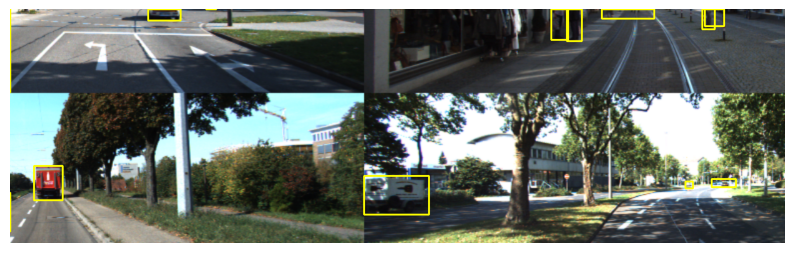

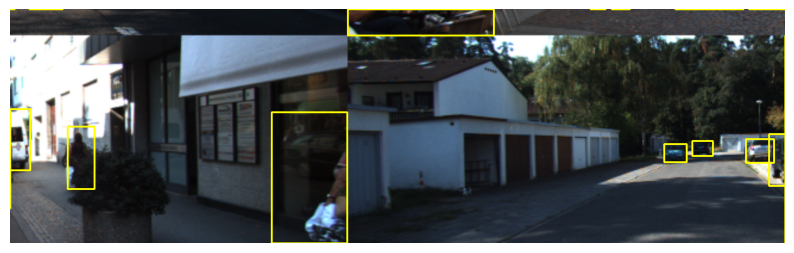

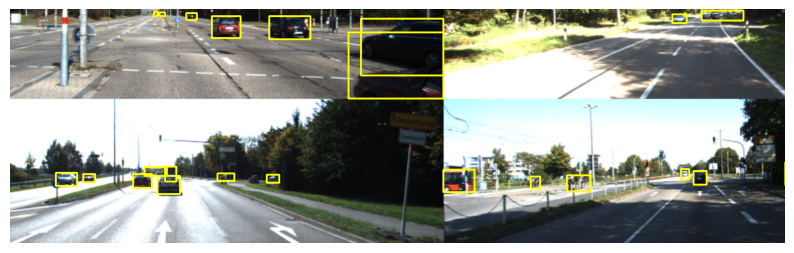

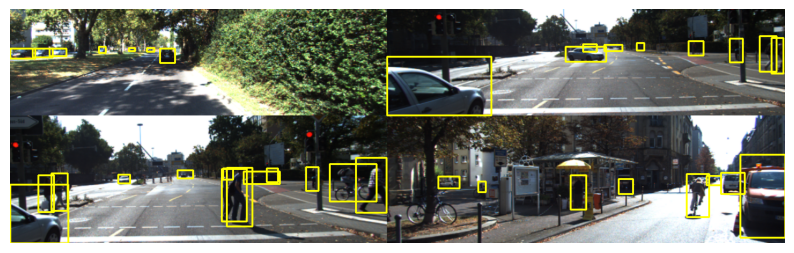

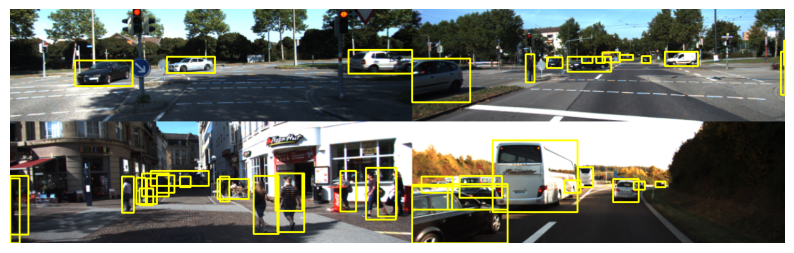

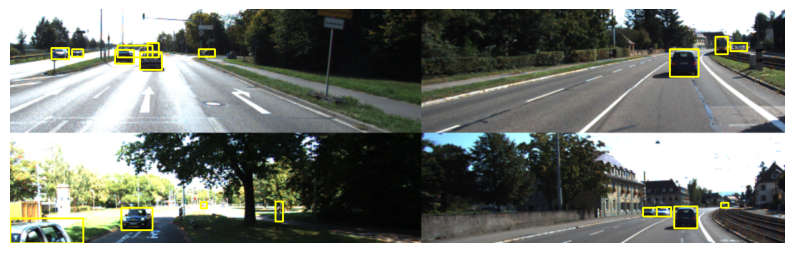

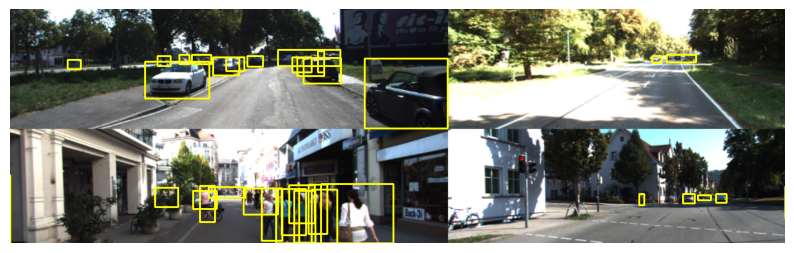

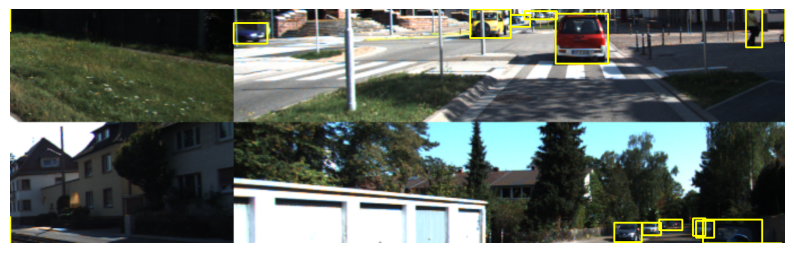

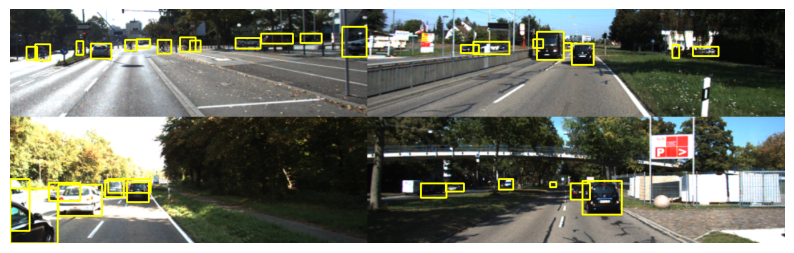

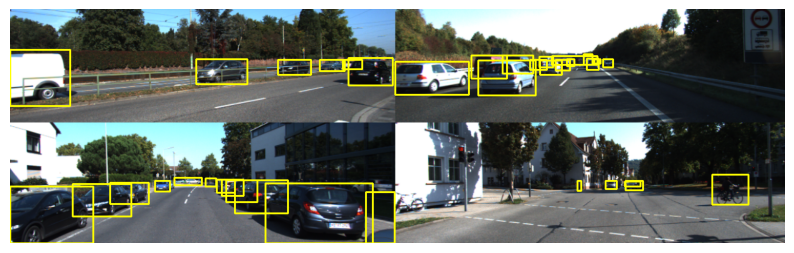

In [3]:
mosaic_2x2_obj = mosaic_2x2(img_h=375, img_w=1242)

for i in range(10):

    idx_list = [4*i + j for j in range(4)]
    image_list = []
    bbox_list = []
    for idx in idx_list:
        image = cv2.imread(selected_labels[idx]['image_path'])
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        bbox = selected_labels[idx]['bbox']
        if bbox.shape[0] == 0: bbox = np.zeros(shape=(0, 4), dtype=np.float32)
        image, bbox = resize_with_warping(image, bbox, 375, 1242)
        image_list.append(image)
        bbox_list.append(bbox)
    classlabel_list = [ selected_labels[idx]['classid'] for idx in idx_list]
    
    new_img, new_bbox, new_classlabel = mosaic_2x2_obj.create_mozaic(
        image_list=image_list, 
        bbox_list=bbox_list, 
        classlabel_list=classlabel_list)

    scale = np.random.uniform(low=0.5, high=1.0)  
    new_img, new_bbox = scaled_random_crop(new_img, new_bbox, scale)   

    draw_bbox_on_img_data(new_img, new_bbox, figsize=(10,8))